In [2]:
from master import *

In [3]:
fq = prefix+'H2qq-CF3.0CA3.0-sqg0100-esq1000/total.root'
X,Y = tools.pre_process(fq,f_gluon,nev_max=50000)
z = np.array([[p[0] for p in jet] for jet in X])
mults = [np.sum([1 if zi > 0 else 0 for zi in jet]) for jet in z]
optimal = an.nk(z,-1)

Finished preprocessing at 12.473288536071777


In [4]:
pfn, pfn_roc, pfn_auc = tools.train_qg_pfn(X,Y,n_epoch=3,summary=False)
pfn_z, pfn_z_roc, pfn_z_auc = tools.train_qg_pfn_no_angular(X,Y,n_epoch=3,summary=False)
pfn_noz, pfn_noz_roc, pfn_noz_auc = tools.train_qg_pfn_only_angular(X,Y,n_epoch=3,summary=False)
efn, efn_roc, efn_auc = tools.train_qg_efn(X,Y,n_epoch=3,summary=False)

Model summary:
Train on 70000 samples, validate on 15000 samples
Epoch 1/3
70000/70000 [==============================] - 2s 32us/step - loss: 0.7019 - acc: 0.5611 - val_loss: 0.6703 - val_acc: 0.5949
Epoch 2/3
70000/70000 [==============================] - 1s 15us/step - loss: 0.6726 - acc: 0.5926 - val_loss: 0.6593 - val_acc: 0.6109
Epoch 3/3
70000/70000 [==============================] - 1s 15us/step - loss: 0.6680 - acc: 0.5974 - val_loss: 0.6595 - val_acc: 0.6119
Finished training at 5.274879455566406

PFN AUC: 0.6429970487830186

Model summary:
Train on 70000 samples, validate on 15000 samples
Epoch 1/3
70000/70000 [==============================] - 2s 23us/step - loss: 0.7307 - acc: 0.5223 - val_loss: 0.6864 - val_acc: 0.5551
Epoch 2/3
70000/70000 [==============================] - 1s 15us/step - loss: 0.6875 - acc: 0.5463 - val_loss: 0.6868 - val_acc: 0.5487
Epoch 3/3
70000/70000 [==============================] - 1s 15us/step - loss: 0.6868 - acc: 0.5497 - val_loss: 0.6867 - v

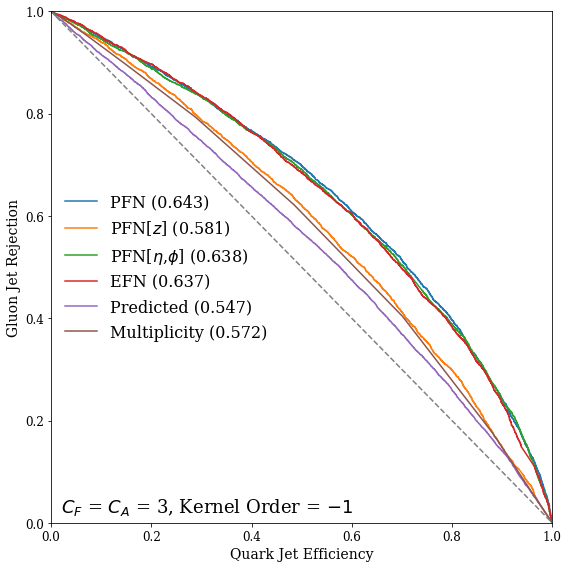

In [6]:
optimal_roc = roc_curve(Y[:,1],optimal)
optimal_auc = roc_auc_score(Y[:,1],optimal)
mult_roc = roc_curve(Y[:,1],mults)
mult_auc = roc_auc_score(Y[:,1],mults)
rocs = [pfn_roc,pfn_z_roc,pfn_noz_roc,efn_roc,optimal_roc,mult_roc]
aucs = [pfn_auc,pfn_z_auc,pfn_noz_auc,efn_auc,optimal_auc,mult_auc]
labels = ["PFN",r"PFN[$z$]",r"PFN[$\eta$,$\phi$]","EFN","Predicted","Multiplicity"]
plotting.plot_many(rocs,aucs,labels)

In [8]:
exps = np.linspace(-5,5)
aucs = []
for k in exps:
    opt = an.nk(z,k)
    auc = roc_auc_score(Y[:,1],opt)
    if auc < 0.5:
        auc = 1 - auc
    aucs.append(auc)

0.9183673469387754

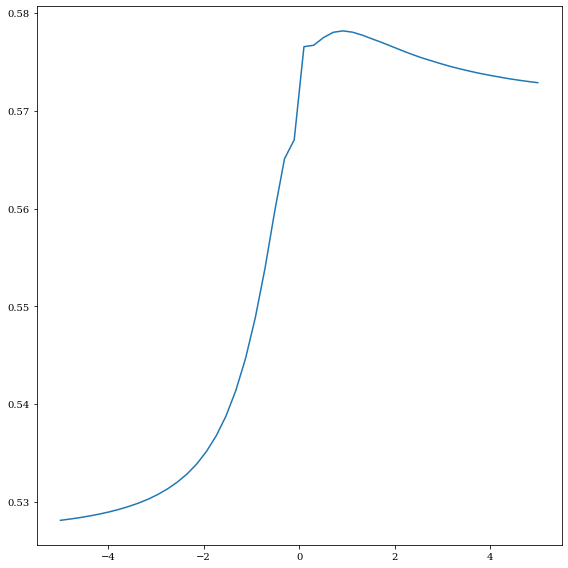

In [12]:
plt.plot(exps,aucs)
exps[np.argmax(aucs)]